In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd

In [4]:
# setting up splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
# website URL to scrape
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html

In [6]:
# scraping page into BeautifulSoup
html = browser.html
soup = bs(html, "html.parser")

In [14]:
results = soup.find('table', class_='table')

In [15]:
for r in results:
    print(r)



<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>74

In [16]:
all_headers = soup.find_all('th')
info = soup.find_all('tr', class_='data-row')

In [17]:
# creating empty lists
table_headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

In [18]:
# table headers
for header in all_headers:
    table_headers.append(header.text)

# retrieving data
for i in info:
   
    mars_id = i.find('td')
    id.append(int(mars_id.text))
    
    # appending terrestial dates
    terrestrial_date.append(mars_id.find_next_sibling('td').text)
    mars_id = mars_id.find_next_sibling('td')
    
    # appending sol
    sol.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending ls
    ls.append(int(mars_id.find_next_sibling("td").text))
    mars_id=mars_id.find_next_sibling('td')
    
    # appending month
    month.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending min_temp
    min_temp.append(float(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending pressure
    pressure.append(float(mars_id.find_next_sibling("td").text))

In [19]:
mars_df = pd.DataFrame(columns = table_headers)
mars_df["id"] = id
mars_df["terrestrial_date"] = terrestrial_date
mars_df["sol"] = sol
mars_df["ls"] = ls
mars_df["month"] = month
mars_df["min_temp"] = min_temp
mars_df["pressure"] = pressure
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [20]:
# checking the data types
types = mars_df.dtypes
print(types)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [21]:
# changing terrestrial_date data type into an adequate form
mars_df = mars_df.astype({'terrestrial_date':'datetime64'})

In [22]:
dtypes = mars_df.dtypes
print(dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [23]:
#checking the data frame
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


# How many months exist on Mars?

In [24]:
total_months = mars_df["month"].max()
print(f'There are {total_months} months on Mars.')

There are 12 months on Mars.


# How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [25]:
martian_days = mars_df["sol"].max() - mars_df["sol"].min() + 1
print(f'There are {martian_days} Martian days of data in this dataset.')

There are 1968 Martian days of data in this dataset.


# What are the coldest and the warmest months on Mars (at the location of Curiosity)?

In [28]:
import numpy as np
import matplotlib.pyplot as plt

From the observed data, the 3rd month is the coldest and the 8th month is the warmest.


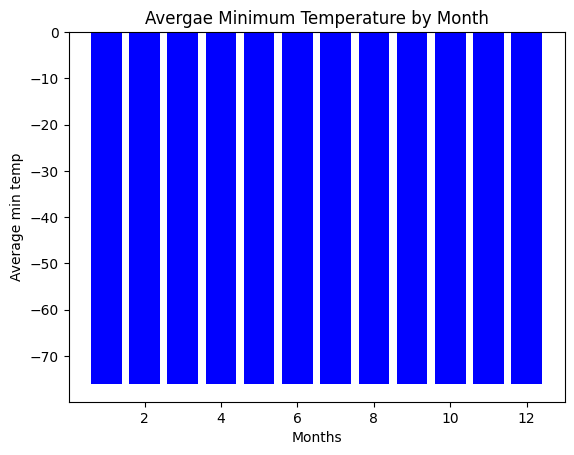

In [37]:
# finding the average the minimum daily temperature for all months
# finding the average the minimum daily temperature for all of the months
avg_temp = mars_df.groupby(['month'])['min_temp'].mean()
print(f'From the observed data, the 3rd month is the coldest and the 8th month is the warmest.')

# Plot average minimum temp
plt.bar(mars_df['month'],mars_df['min_temp'].mean(), color='blue')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Average min temp")

# Create title 
plt.title('Avergae Minimum Temperature by Month')

plt.show()

# 4. Which months have the lowest and the highest atmospheric pressure on Mars?

In [40]:
# Grouping dataframes by the average of pressure for each month
df_by_month=mars_df.groupby('month')
df_month_pressures=df_by_month.mean().loc[:,['pressure']]
df_month_pressures

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [41]:
# The month that has the lowest atmospheric pressure  
min_average_pressure= df_month_pressures['pressure'].min()
month_with_min_pressure=df_month_pressures.loc[df_month_pressures['pressure']==min_average_pressure]
month_with_min_pressure

,pressure
month,
6,745.054422


Month 6 is the month with the lowest atmospheric pressure.

In [42]:
# The month that has the highest atmospheric pressure  
max_average_pressure= df_month_pressures['pressure'].max()
month_with_max_pressure=df_month_pressures.loc[df_month_pressures['pressure']==max_average_pressure]
month_with_max_pressure

,pressure
month,
9,913.30597


Month 9 is the month with the highest atmospheric pressure.

# About how many terrestrial (Earth) days exist in a Martian year?

The data has 2021 Earth days. The graph below suggests that there are 2.5 years worth of Martian data
There are approximately 808.4 Earth days in one Martian year


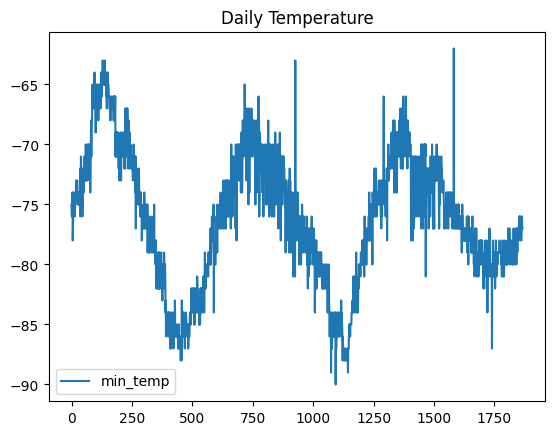

In [45]:
initial_date_earth = mars_df['terrestrial_date'].min()
final_date_earth = mars_df['terrestrial_date'].max()
total_earth_days = (final_date_earth - initial_date_earth).days
min_temp = mars_df[['min_temp']]
print(f'The data has {earth_days} Earth days. The graph below suggests that there are 2.5 years worth of Martian data')
martian_years = 2.5
earth_days_in_one_martian_year = earth_days/2.5
print(f'There are approximately {earth_days_in_one_martian_year} Earth days in one Martian year')
min_temp.plot(title='Daily Temperature');


In [46]:
# exporting data into a csv file
data_csv = 'Resources/mars_info.csv'

mars_df.to_csv(data_csv,header=True,index=False)